In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns

# Correlation function

### Arguments

df: dataframe with barcodes and indexes and genes as columns <br>
corrwith: genes of interest to perform the correlation. "all" will correlate all genes. Use a list of genes to subset the analysis <br> 
subset: use a list of genes to subset the correlation. By default it will correlate the genes in corrwith with all other genes<br> 
method: choose between pearson, kendall or spearman correlations<br> 

In [2]:
def gene_corr(df,corrwith="all",subset=None,method=("pearson", "kendall", "spearman")):
    if subset is not None:
        inter=set(corrwith+subset)
        tmp=df[df.columns.intersection(inter)]
    if subset is None:
        tmp=df
    if corrwith!="all":
        d=pd.DataFrame()
        for i in corrwith:
            tmp2=tmp.corrwith(tmp[i],method=method)
            d=pd.concat([d,tmp2],axis=1)
        d=d.set_axis(corrwith,axis=1,copy=False)
    else:
        d=tmp.corr(method=method)
    if subset is not None:
        d=d[d.index.isin(subset)]
    return d

In [7]:
sc.settings.set_figure_params(dpi=300,fontsize=15)

# Load Data

In [3]:
adata=sc.read_h5ad("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Test/Test2_nolog/bin50_merged_correlation.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 560412 × 99
    obs: 'X_Y_bins', 'X_coor', 'Y_coor', 'library_id', 'n_genes', 'n_counts'
    uns: 'log1p', 'spatial'
    obsm: 'spatial'

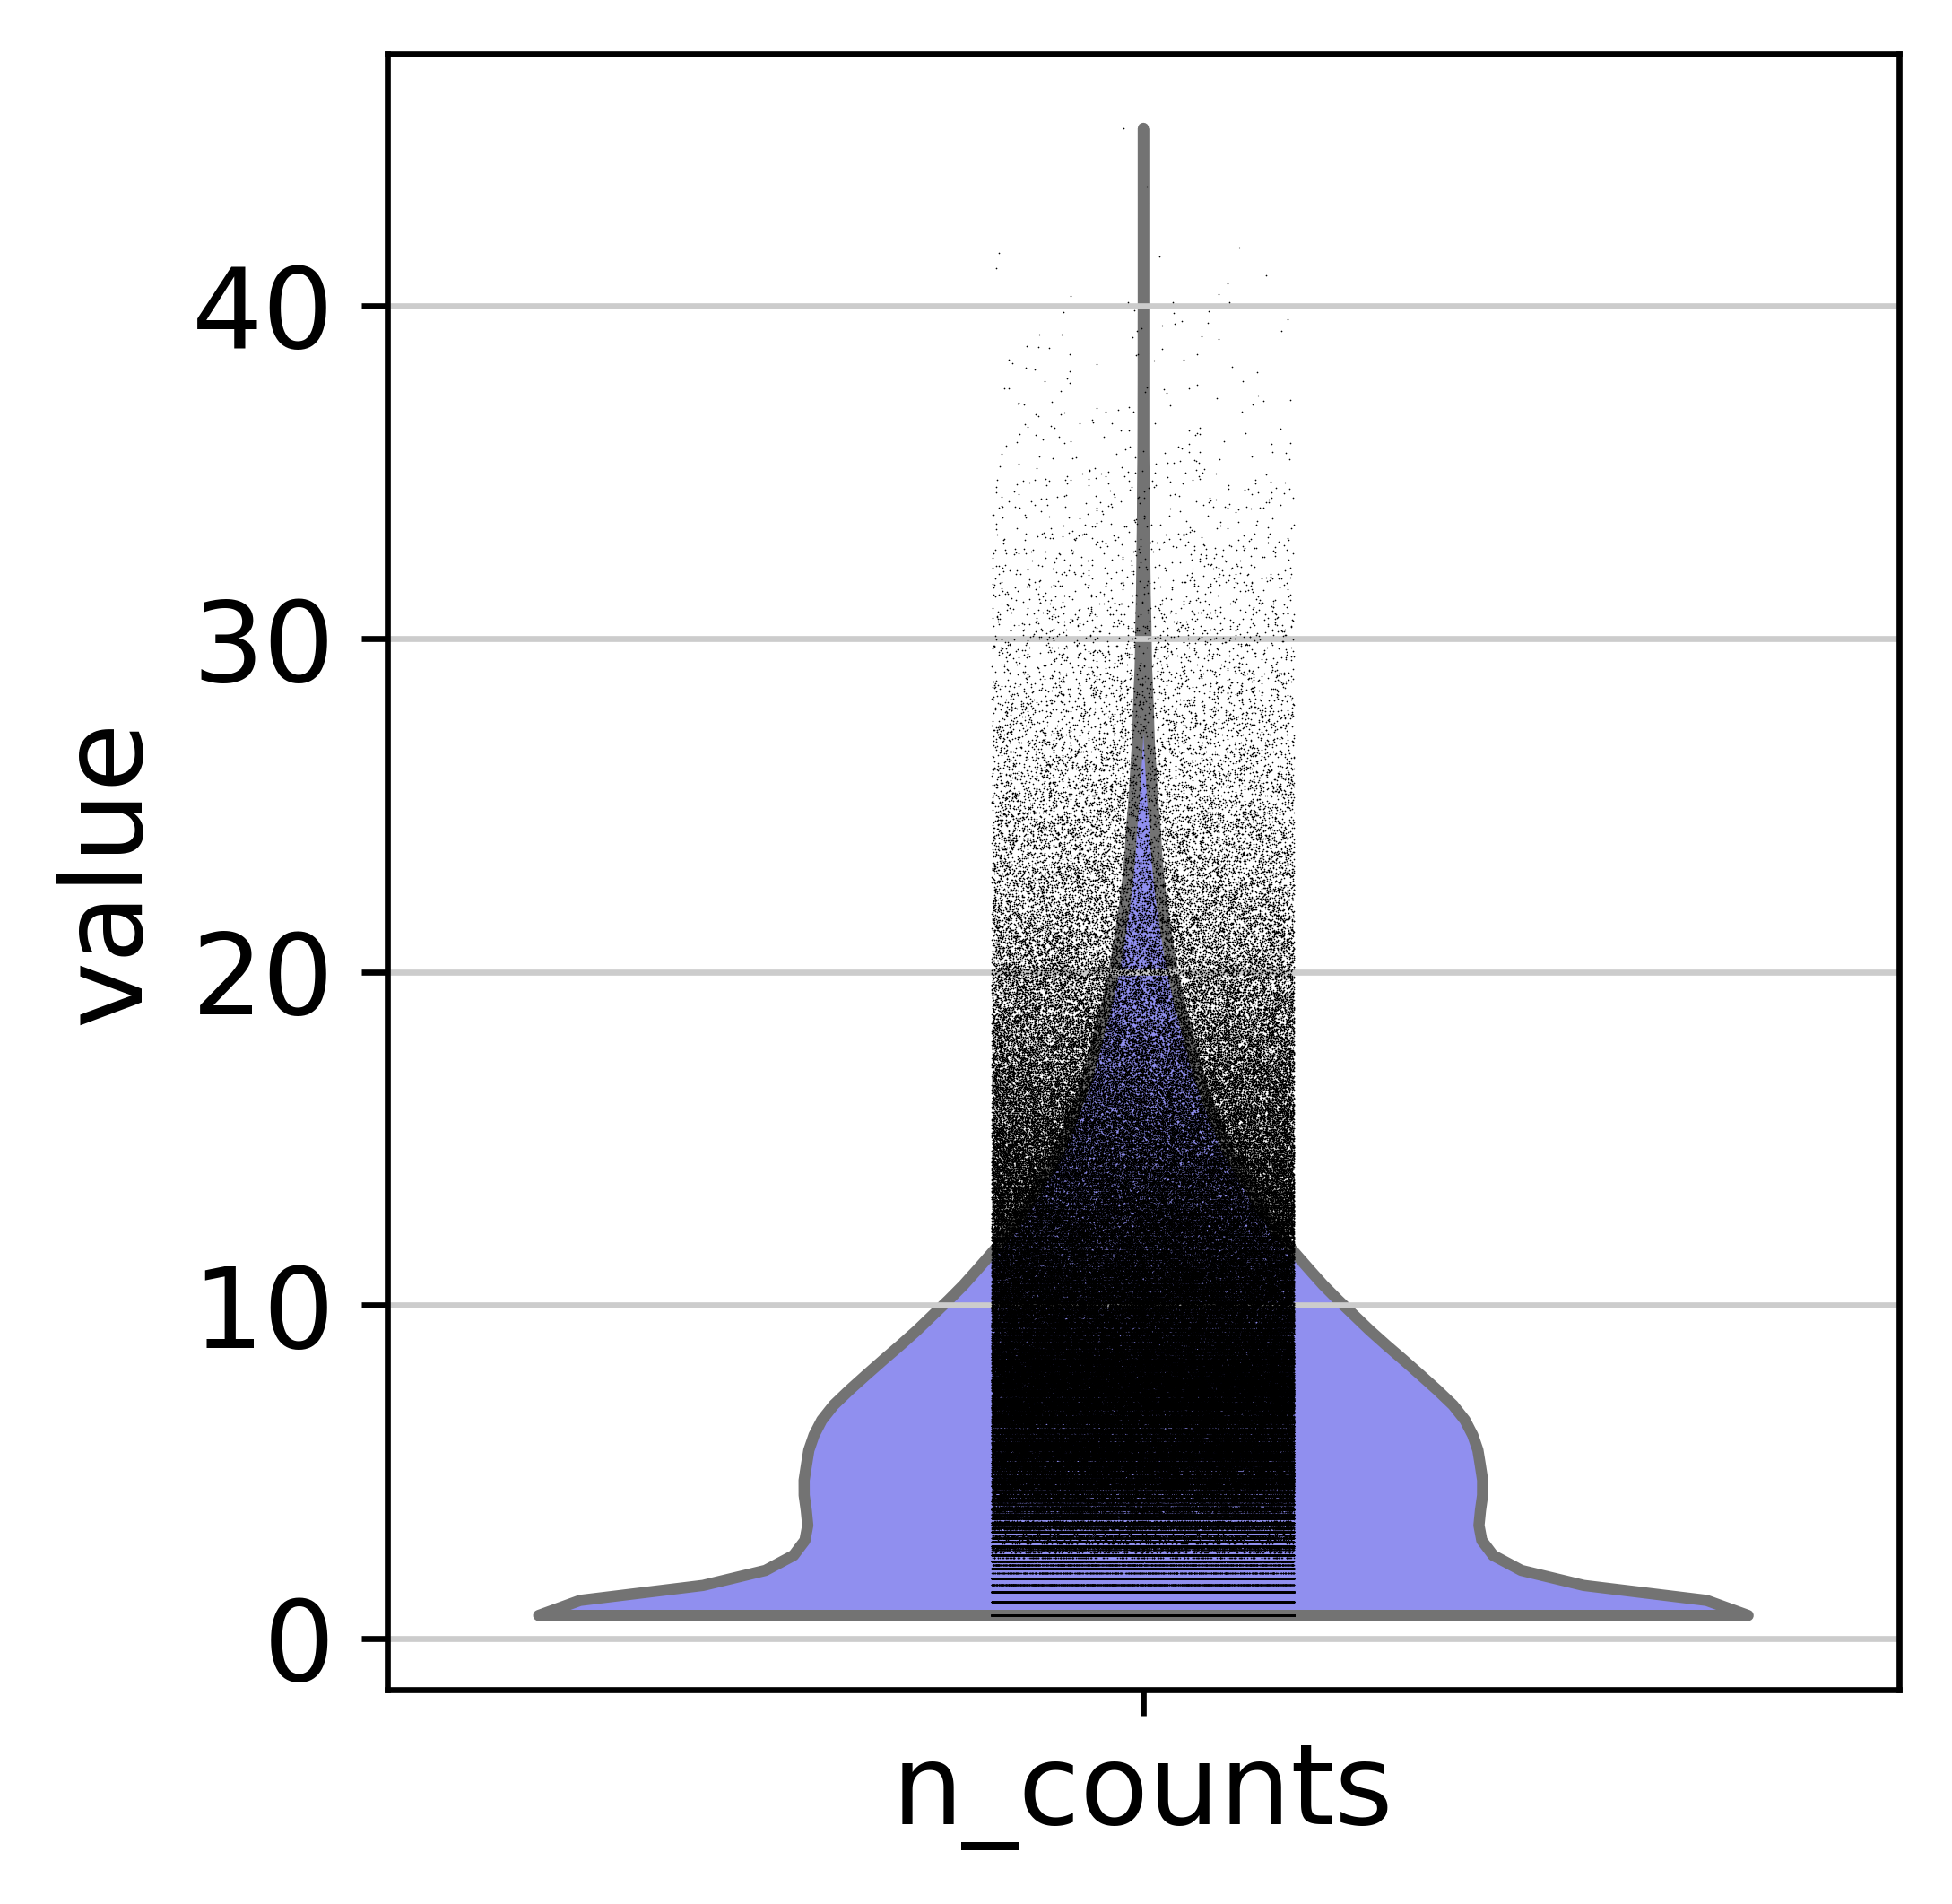

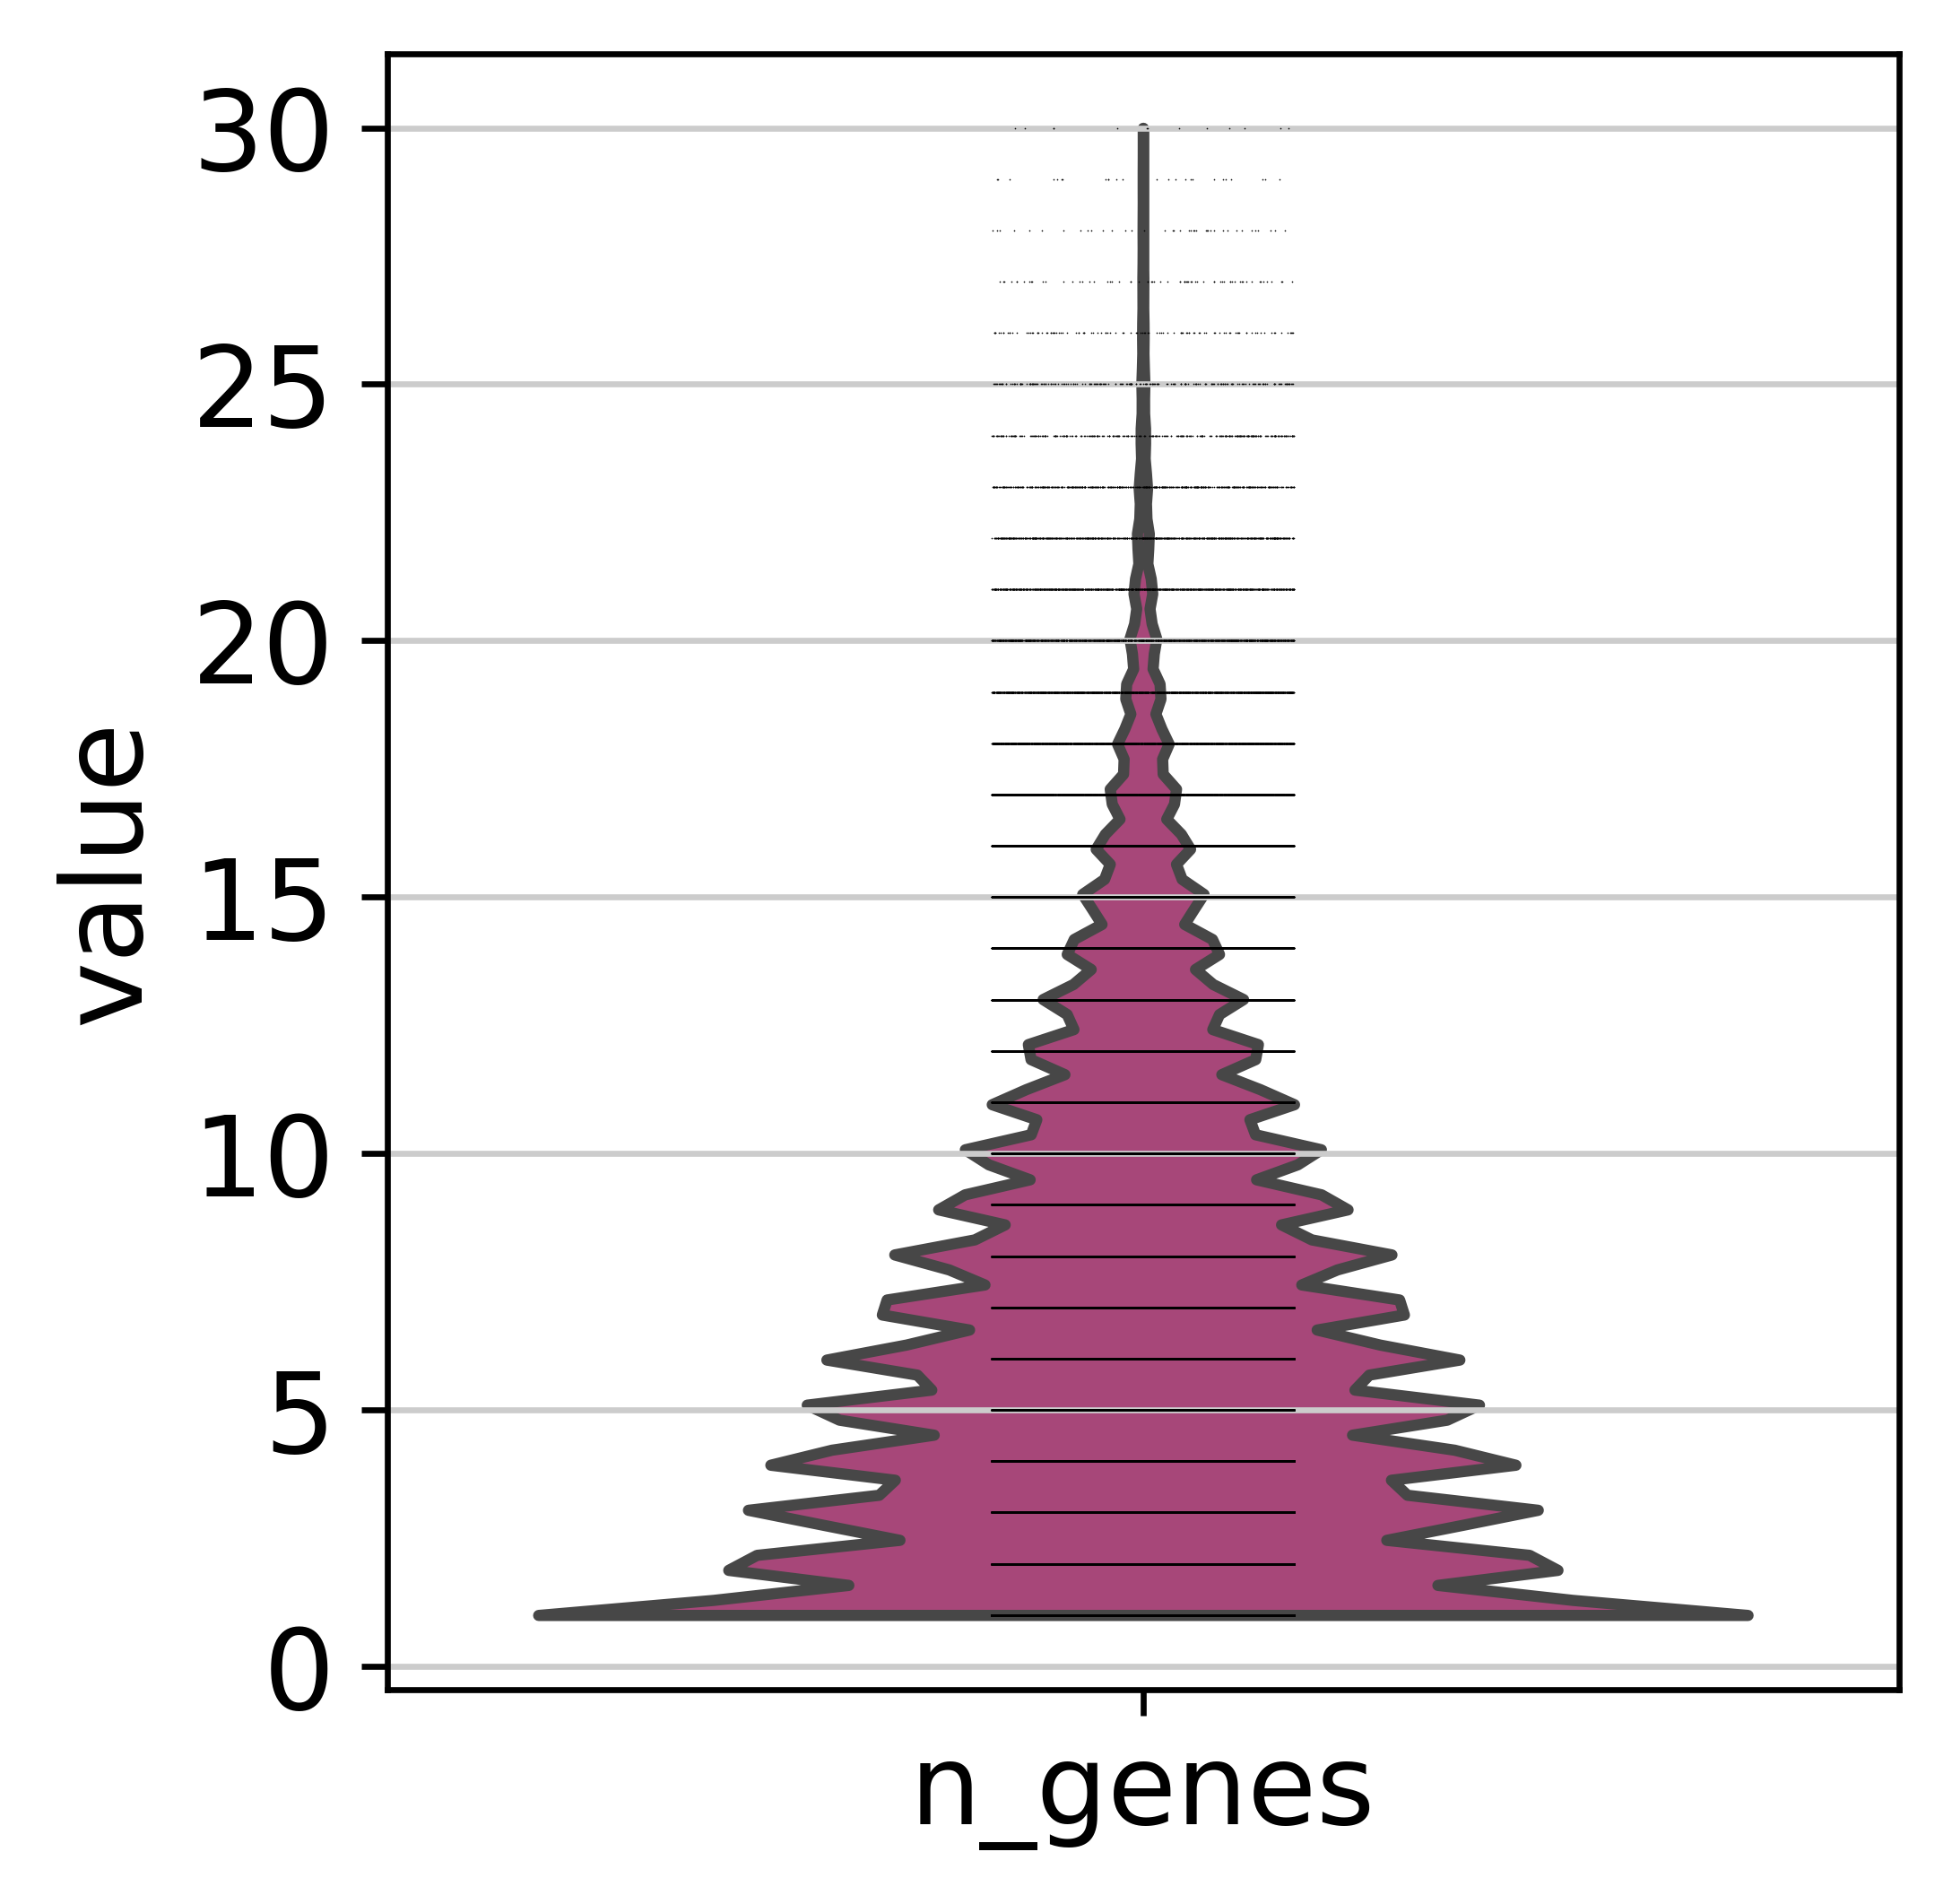

In [17]:
sc.pl.violin(adata, keys = ["n_counts"], size = 0.2, palette = 'cool')
sc.pl.violin(adata, keys = ["n_genes"], size = 0.2, palette = 'magma')

In [18]:
adata.obs["vasculature"] = ((adata.X[:,adata.var_names=='VWF'] > 0) & (adata.X[:,adata.var_names=='TTN'] == 0)) + ((adata.X[:,adata.var_names=='CDH5'] > 0) & (adata.X[:,adata.var_names=='TTN'] == 0)) 

In [19]:
adata_vasc = adata[adata.obs['vasculature'] == True]

In [20]:
adata_vasc

View of AnnData object with n_obs × n_vars = 40744 × 99
    obs: 'X_Y_bins', 'X_coor', 'Y_coor', 'library_id', 'n_genes', 'n_counts', 'vasculature'
    uns: 'log1p', 'spatial'
    obsm: 'spatial'

# Create dataframe for correlations

In [21]:
df=pd.DataFrame(index=adata_vasc.obs.index)

In [22]:
for i in adata_vasc.var.index: 
    #this will create a daframe will all the genes and therefore take a long time. 
    #If only correlating certain genes of interest substitute adata.var.index with a list of genes
    df[i]=np.asarray(pd.DataFrame(adata_vasc[:, i].X))

In [23]:
df

,ACKR1,ADGRA3,ADGRD1,ADGRL1,ADGRL3,ADRB1,AGT,AGTR1,BNC1,C1QA,...,TBX3,TCF15,TFF3,TH,TIMD4,TTN,VCAM1,VIP,VIPR2,VWF
index,,,,,,,,,,,,,,,,,,,,,
0.0_1450.0_A1-1_33175-slide1561-1_A1-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.098612
0.0_1500.0_A1-1_33175-slide1561-1_A1-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.995732
0.0_1550.0_A1-1_33175-slide1561-1_A1-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,2.708050
0.0_1600.0_A1-1_33175-slide1561-1_A1-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.639057
0.0_1650.0_A1-1_33175-slide1561-1_A1-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950.0_2600.0_D2-3_33175-slide1561-1_D2-3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.693147,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.791759
9950.0_2650.0_D2-3_33175-slide1561-1_D2-3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,1.945910
9950.0_2700.0_D2-3_33175-slide1561-1_D2-3,0.0,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.772589


# Correlations

### Correlate all genes

Not recommended interactively, it will take a long time. Best to submit to hpc and save the result as a csv

In [11]:
#genecor=gene_corr(df,corrwith="all",method="pearson")

### Correlate two subsets of genes:

In [32]:
genes=["CLDN5","RGCC","CA4","FABP4","MEOX2","TCF15","SEMA3G","GJA5","SULF1","ACKR1","SELE","PLVAP","POSTN","INHBA","SMOC1","CGNL1","ICAM1","VCAM1","CCL21","TFF3"]
subset=["CLDN5","RGCC","CA4","FABP4","MEOX2","TCF15","SEMA3G","GJA5","SULF1","ACKR1","SELE","PLVAP","POSTN","INHBA","SMOC1","CGNL1","ICAM1","VCAM1","CCL21","TFF3"]

In [33]:
genecor=gene_corr(df,corrwith=genes,subset=subset,method="pearson")

In [34]:
genecor

,CLDN5,RGCC,CA4,FABP4,MEOX2,TCF15,SEMA3G,GJA5,SULF1,ACKR1,SELE,PLVAP,POSTN,INHBA,SMOC1,CGNL1,ICAM1,VCAM1,CCL21,TFF3
ACKR1,-0.108928,-0.147511,-0.061114,-0.075878,0.016757,-0.073497,-0.056887,-0.121255,-0.000463,1.000000,0.212457,0.491395,0.393960,-0.088183,-0.090915,0.006372,0.178128,0.367797,0.023776,0.083138
CA4,0.165419,0.280304,1.000000,0.206475,0.052114,0.171141,-0.024292,-0.044231,-0.032267,-0.061114,-0.011309,-0.036526,-0.080592,-0.051946,-0.051790,-0.039046,0.039419,-0.032698,-0.016684,-0.005219
CCL21,0.016506,-0.045486,-0.016684,0.006541,-0.014974,-0.022477,-0.013757,-0.028202,-0.002810,0.023776,-0.000294,0.044692,0.042999,0.029509,0.060123,0.013854,0.001729,0.024968,1.000000,0.169854
CGNL1,-0.031672,-0.055884,-0.039046,-0.062052,0.000108,-0.030422,0.011067,-0.021314,0.050299,0.006372,-0.006145,0.139979,0.185161,0.188476,0.189882,1.000000,0.025424,0.049085,0.013854,0.015193
CLDN5,1.000000,0.223097,0.165419,0.358177,0.186423,0.236634,0.229440,0.436317,0.173047,-0.108928,-0.026710,-0.114871,-0.115266,-0.074964,-0.096998,-0.031672,0.107670,-0.023621,0.016506,0.012047
FABP4,0.358177,0.509313,0.206475,1.000000,0.276602,0.367320,0.183538,0.197165,-0.064089,-0.075878,0.013357,-0.089238,-0.187322,-0.150089,-0.165280,-0.062052,0.093720,-0.027866,0.006541,0.008132
GJA5,0.436317,-0.036822,-0.044231,0.197165,0.168032,0.066366,0.322946,1.000000,0.336290,-0.121255,-0.039306,-0.111856,-0.087199,-0.038337,-0.083462,-0.021314,0.085066,-0.010944,-0.028202,-0.010928
ICAM1,0.107670,0.057119,0.039419,0.093720,0.071860,0.062940,0.051127,0.085066,0.048956,0.178128,0.153809,0.142635,0.136047,0.018548,0.039408,0.025424,1.000000,0.181950,0.001729,0.025559
INHBA,-0.074964,-0.139348,-0.051946,-0.150089,-0.056109,-0.072148,-0.021061,-0.038337,0.093240,-0.088183,-0.019428,0.223069,0.220578,1.000000,0.525772,0.188476,0.018548,0.054517,0.029509,-0.005657
MEOX2,0.186423,0.167345,0.052114,0.276602,1.000000,0.152722,0.138529,0.168032,-0.002116,0.016757,-0.011596,-0.010275,-0.046418,-0.056109,-0.069613,0.000108,0.071860,0.018128,-0.014974,0.030074


In [35]:
genecor.fillna(0, inplace=True)

In [36]:
genecor.index = pd.CategoricalIndex(genecor.index, categories= ["CLDN5","RGCC","CA4","FABP4","MEOX2","TCF15","SEMA3G","GJA5","SULF1","ACKR1","SELE","PLVAP","POSTN","INHBA","SMOC1","CGNL1","ICAM1","VCAM1","CCL21","TFF3"])
genecor.sort_index(level=0, inplace=True)

In [37]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(rc={'figure.figsize':(15,8)})

<AxesSubplot:>

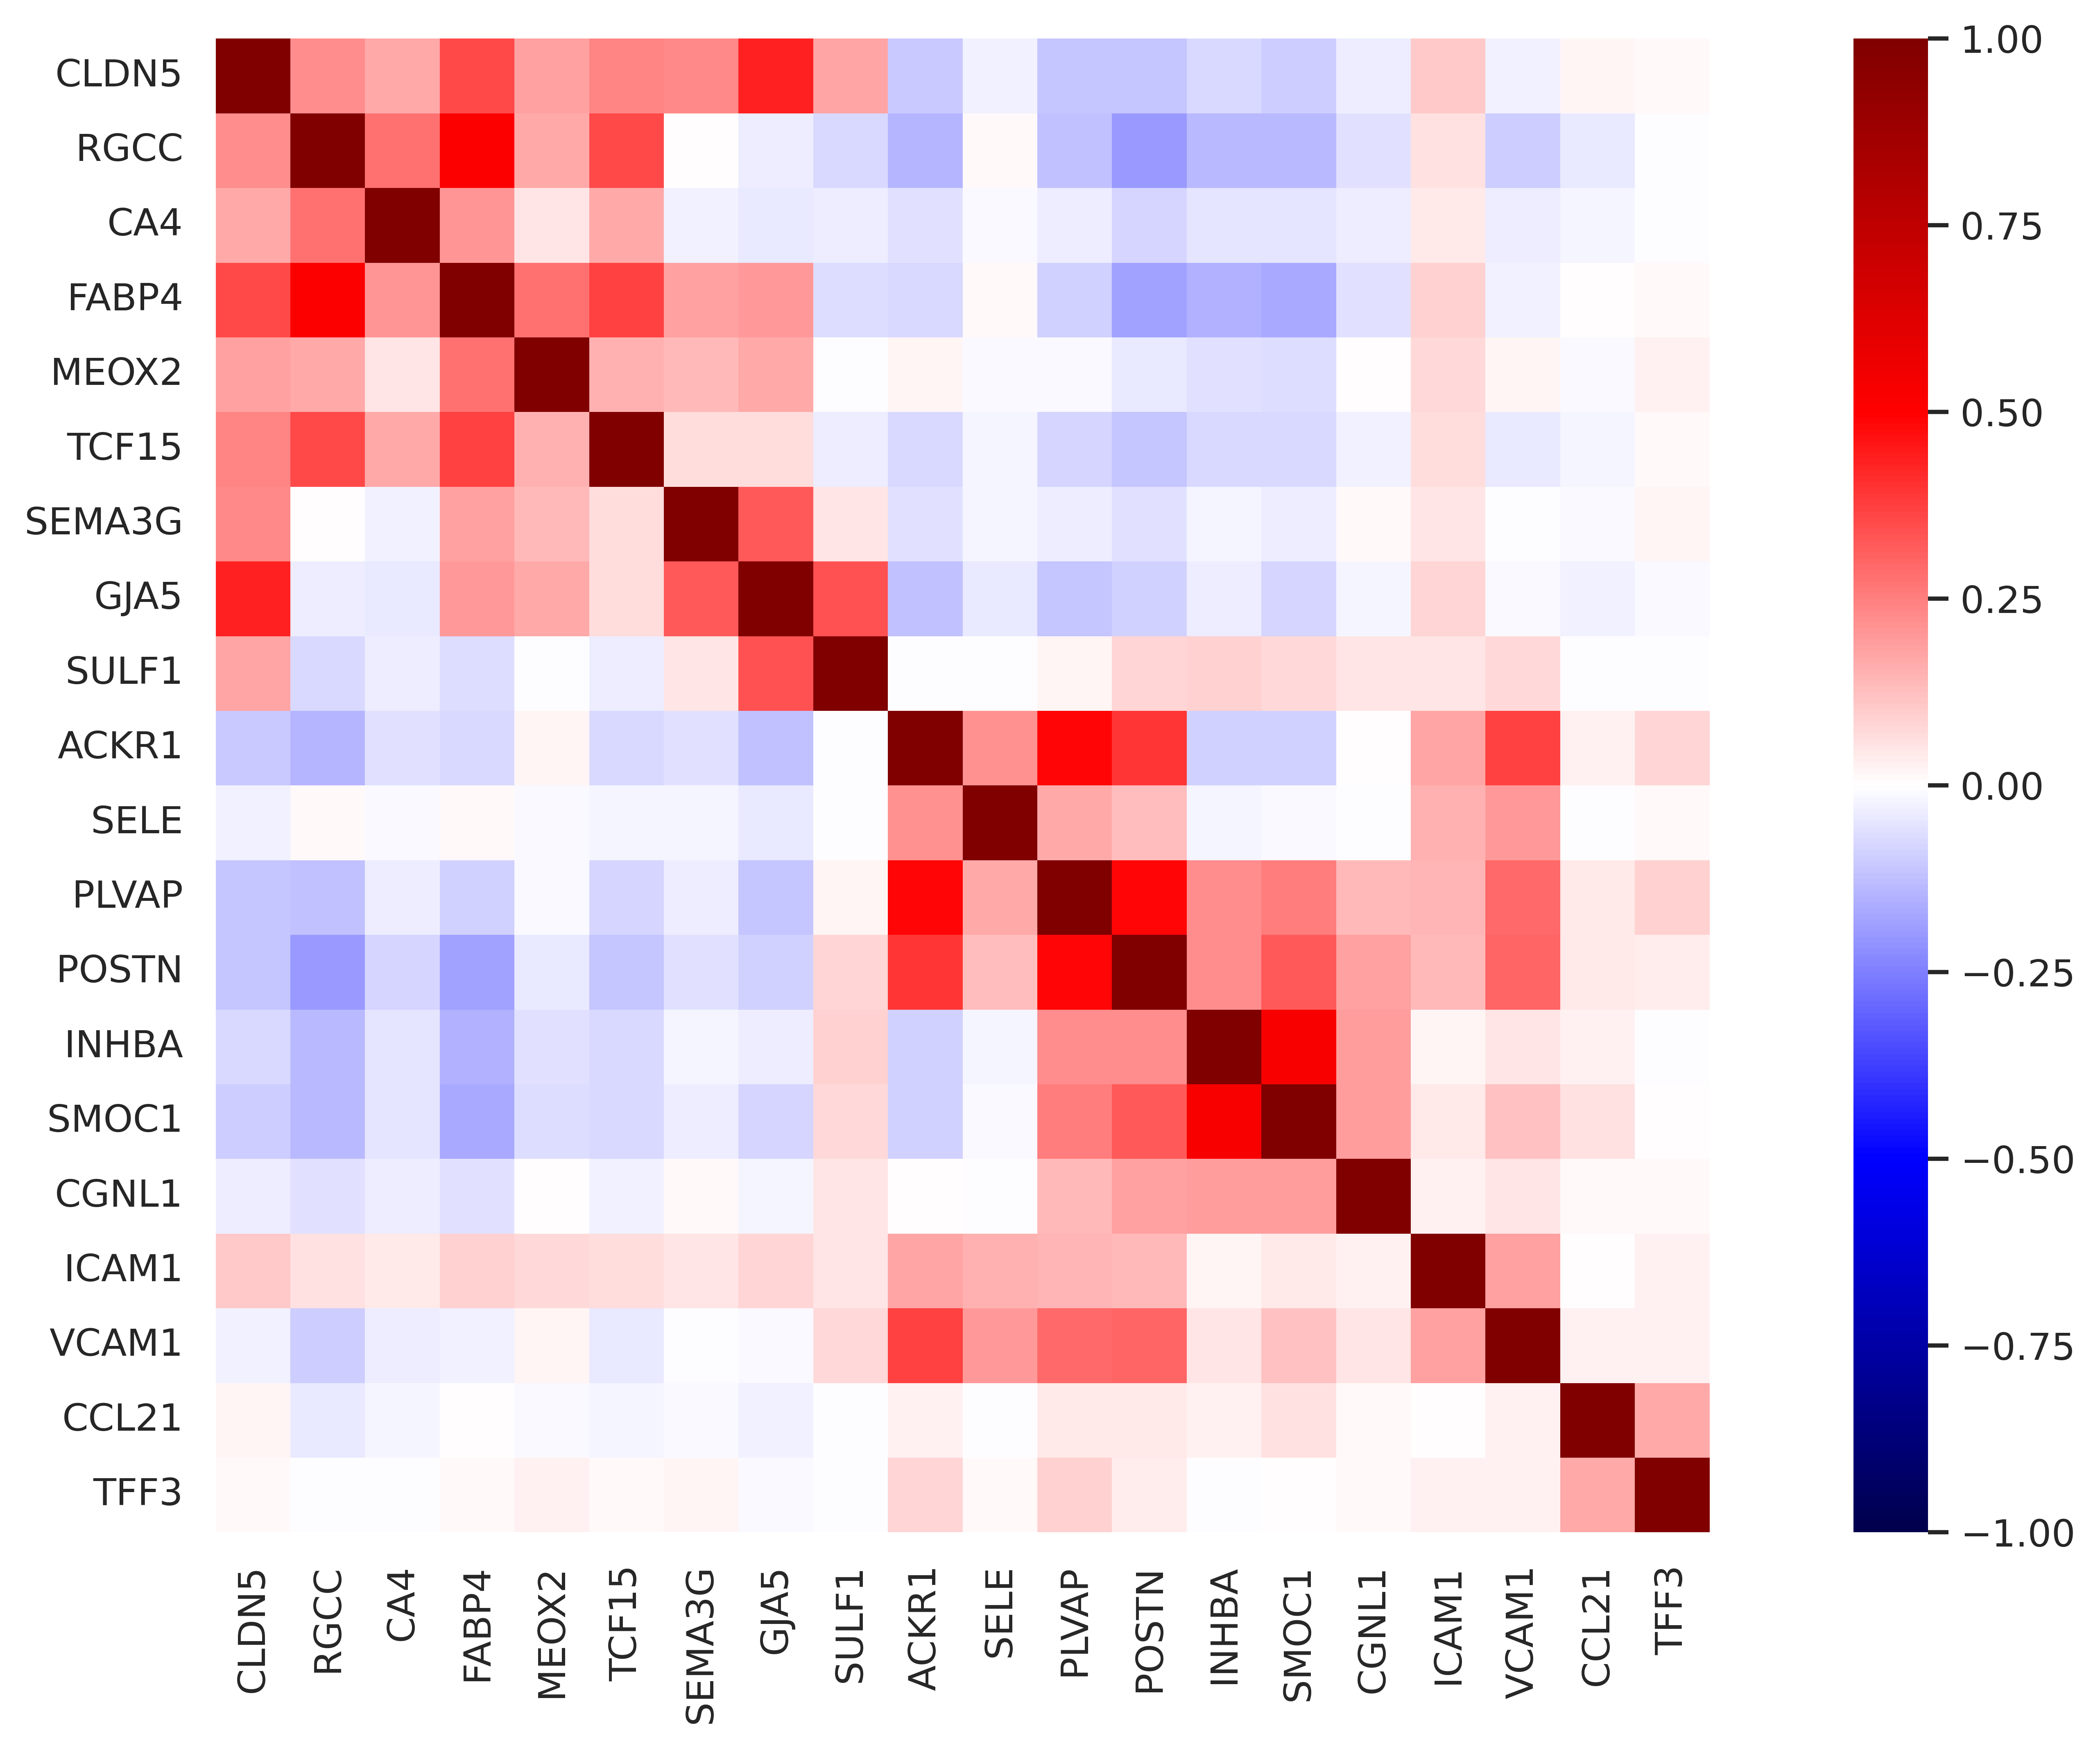

In [38]:
sns.heatmap(genecor,annot=False,cmap="seismic",center=0,vmin=-1,vmax=1, square = True)

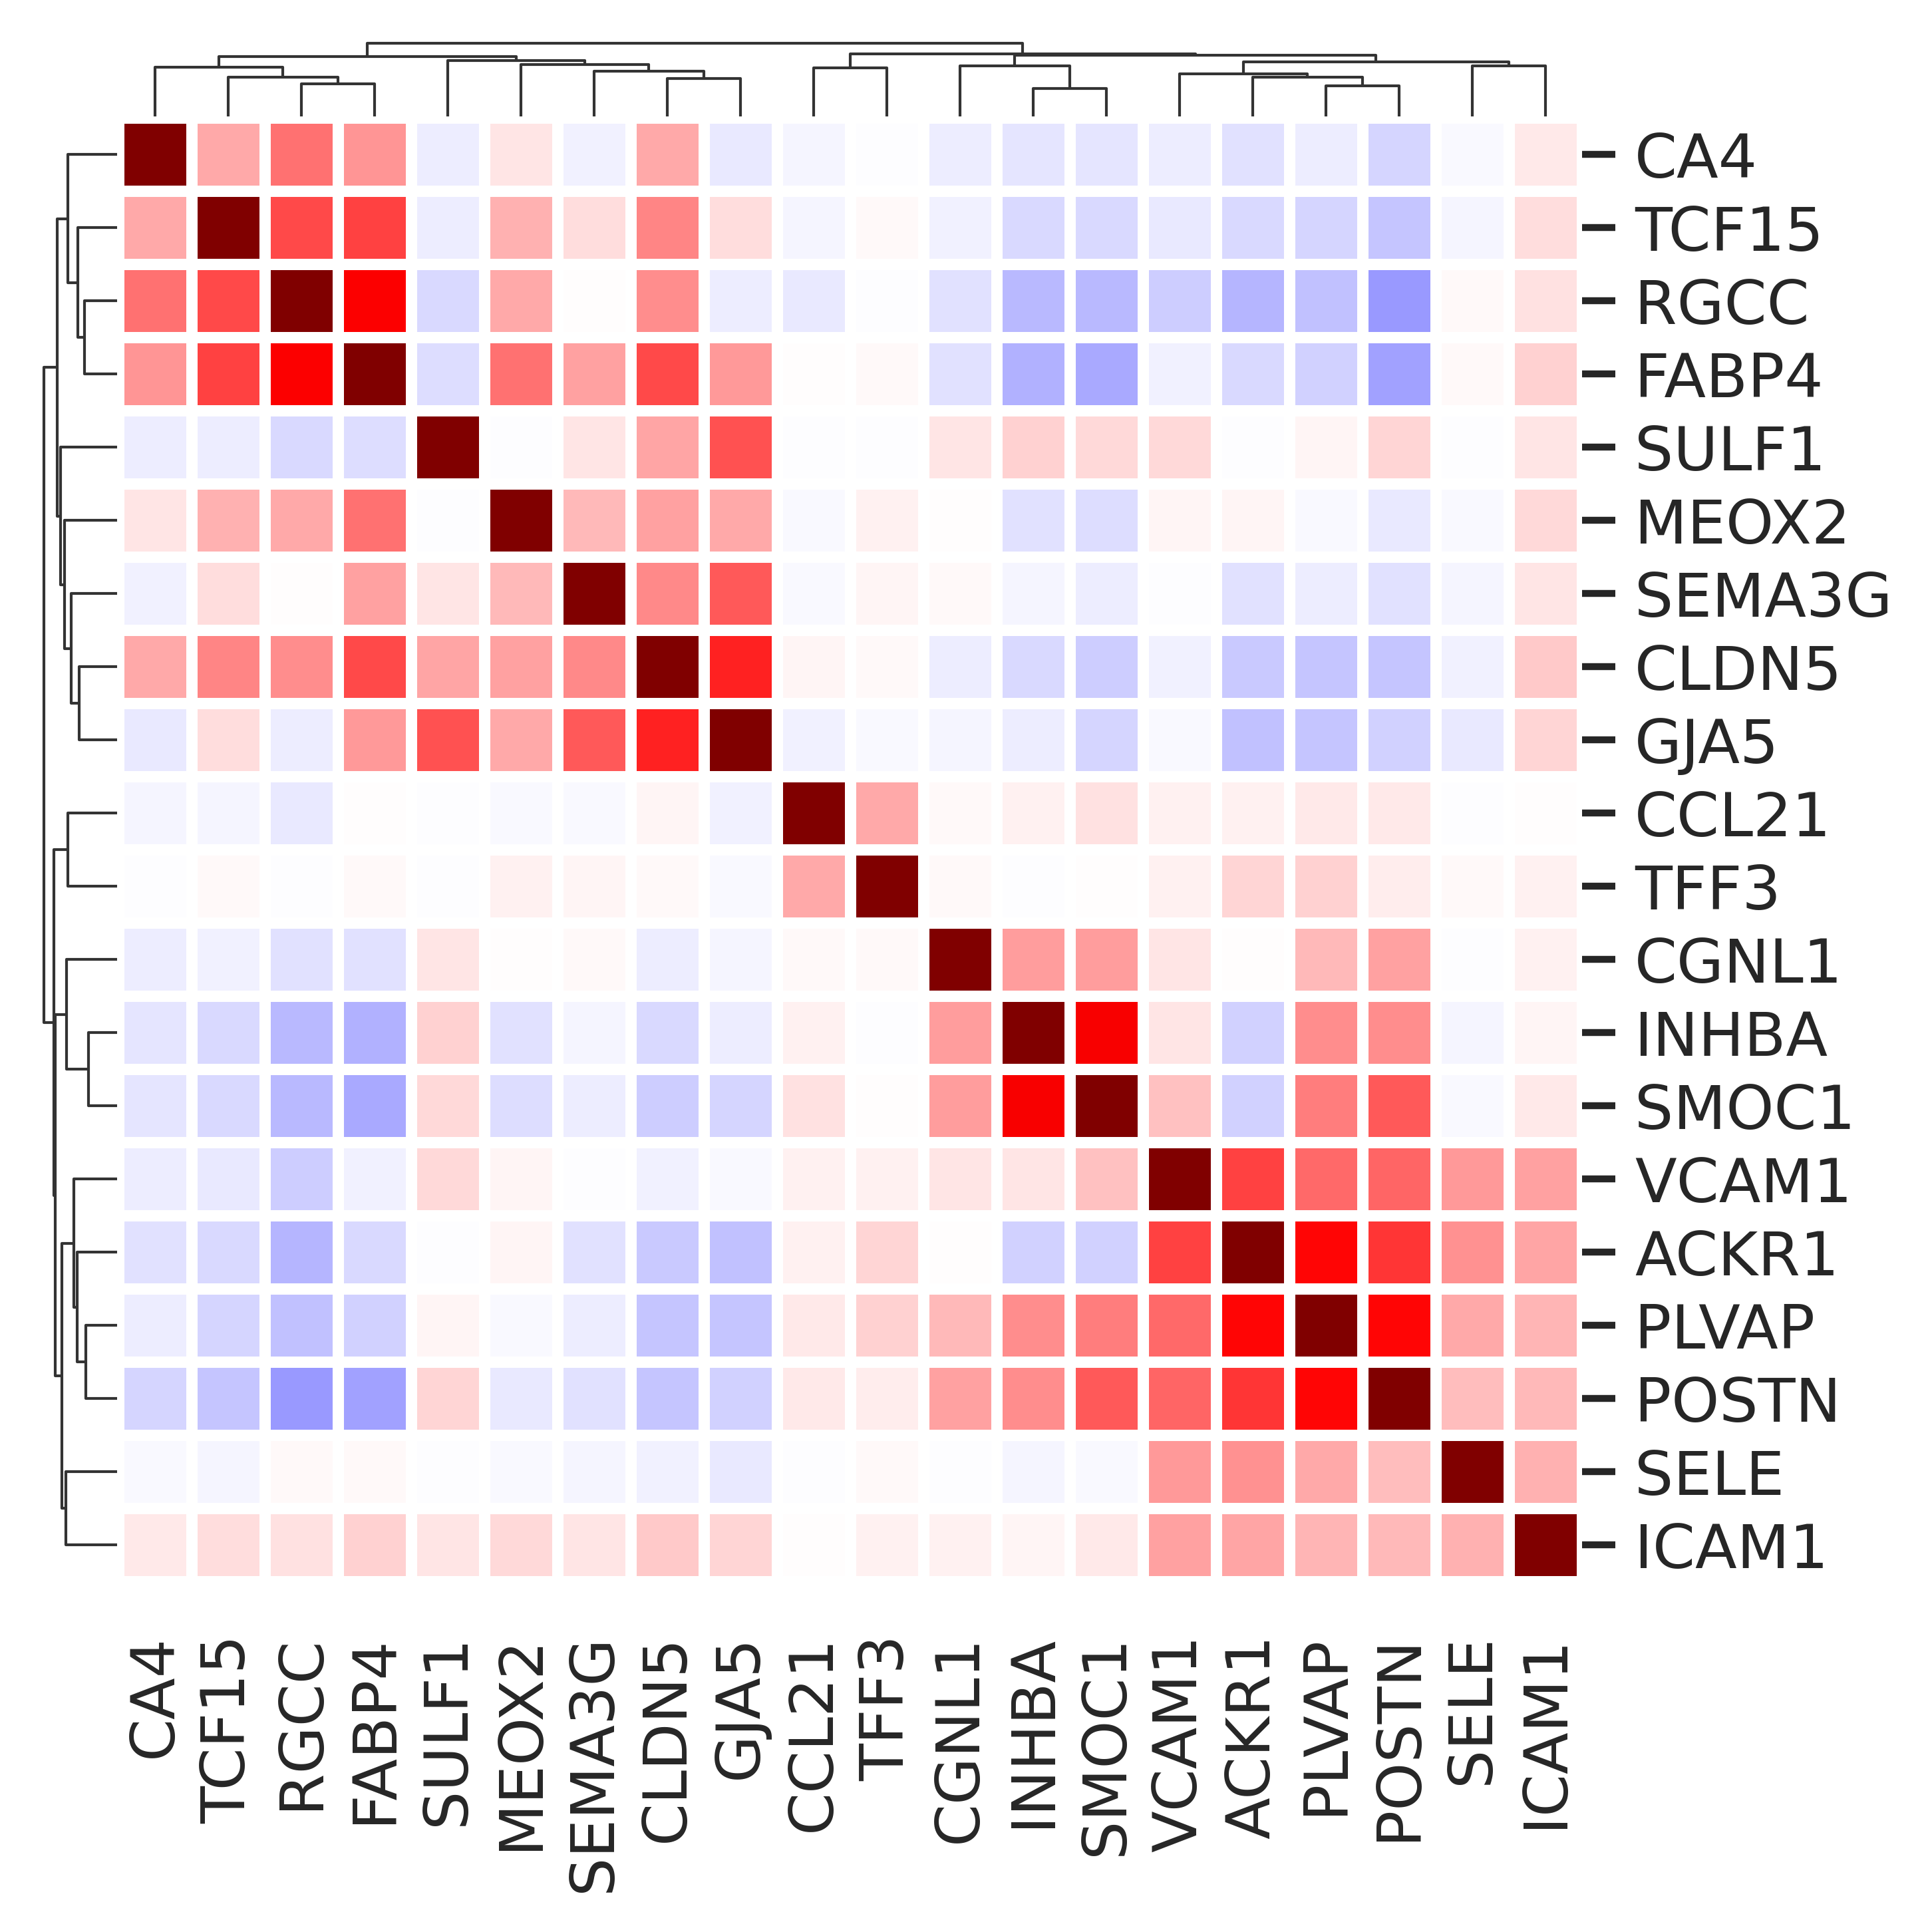

In [50]:
sns.clustermap(genecor, method='average',vmin=-1,vmax=1, cmap="seismic",center=0, square = True, dendrogram_ratio=0.05, figsize =(5,5), cbar_pos = None, linecolor = "white", linewidth = 2)